___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [137]:
df = pd.read_csv("final_scout_dummy.csv")

In [138]:
df.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
Gears,7.000,7.000,7.000,6.000,7.000
age,3.000,2.000,3.000,3.000,3.000
Previous_Owners,2.000,1.000,1.000,1.000,1.000
hp_kW,66.000,141.000,85.000,66.000,66.000
Inspection_new,1.000,0.000,0.000,0.000,1.000
Displacement_cc,1422.000,1798.000,1598.000,1422.000,1422.000
Weight_kg,1220.000,1255.000,1135.000,1195.000,1135.000
cons_comb,3.800,5.600,3.800,3.800,4.100


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Columns: 134 entries, price to Drive_chain_rear
dtypes: float64(9), int64(125)
memory usage: 16.3 MB


In [140]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
count,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000,15914.000
mean,18023.741,32090.368,5.937,1.390,1.043

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [228]:
X = df.drop("price", axis =1)
y = df["price"]

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [161]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [162]:
lm.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [165]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.890,0.890
mae,1705.479,1712.819
mse,6016853.574,5794422.716
rmse,2452.928,2407.161


In [166]:
####################################################

### Standard Scaler and MinMaxScaler

In [231]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [232]:
X_train_scaled = scaler.fit_transform(X_train)

In [233]:
X_test_scaled = scaler.transform(X_test)

In [234]:
lm_sc = LinearRegression()

In [235]:
lm_sc.fit(X_train_scaled, y_train)

LinearRegression()

In [236]:
y_scaled_pred = lm_sc.predict(X_test_scaled)
y_train_scaled_pred = lm_sc.predict(X_train_scaled)

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_scaled_pred, y_test, y_scaled_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_scaled_pred),
    "mae" : mean_absolute_error(y_train, y_train_scaled_pred),
    "mse" : mean_squared_error(y_train, y_train_scaled_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_scaled_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_scaled_pred),
    "mae" : mean_absolute_error(y_test, y_scaled_pred),
    "mse" : mean_squared_error(y_test, y_scaled_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_scaled_pred))}}
    
    return pd.DataFrame(scores)

In [238]:
ls2 = train_val(y_train, y_train_scaled_pred, y_test, y_scaled_pred, "linear")
ls2

,linear_train,linear_test
R2,0.890,0.890
mae,1705.479,1712.819
mse,6016853.574,5794422.716
rmse,2452.928,2407.161


In [175]:
###########################################################

In [176]:
from sklearn.model_selection import cross_validate, cross_val_score

In [177]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [178]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.191,0.009,0.885,-1729.179,-5844267.500,-2417.492
2,0.148,0.007,0.886,-1739.462,-6534149.661,-2556.198
3,0.133,0.007,0.888,-1737.725,-6476826.356,-2544.961
4,0.138,0.009,0.894,-1708.680,-5726462.058,-2393.003
5,0.151,0.011,0.878,-1746.175,-6701621.559,-2588.749


In [179]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1732.244
test_neg_mean_squared_error        -6256665.427
test_neg_root_mean_squared_error      -2500.081
dtype: float64

In [180]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-0.036
1,579.344
2,-1604.401
3,132.565
4,93.165
5,-170.163
6,-0.710
7,-1.076
8,506.445
9,-24.879


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [181]:
from sklearn.linear_model import Ridge, RidgeCV

In [182]:
ridge_model = Ridge(alpha=1, random_state=101)

In [183]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, random_state=101)

In [184]:
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [185]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.890,0.890
mae,1705.641,1713.888
mse,6018151.520,5800371.475
rmse,2453.192,2408.396


In [186]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.890,0.890,0.890,0.890
mae,1705.479,1712.819,1705.641,1713.888
mse,6016853.574,5794422.716,6018151.520,5800371.475
rmse,2452.928,2407.161,2453.192,2408.396


In [187]:
###############################

In [188]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [189]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [190]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [191]:
ridge_cv_model.alpha_

1.0

In [192]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [193]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.890,0.890
mae,1705.641,1713.888
mse,6018151.520,5800371.475
rmse,2453.192,2408.396


In [194]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.890,0.890,0.890,0.890,0.890,0.890
mae,1705.479,1712.819,1705.641,1713.888,1705.641,1713.888
mse,6016853.574,5794422.716,6018151.520,5800371.475,6018151.520,5800371.475
rmse,2452.928,2407.161,2453.192,2408.396,2453.192,2408.396


In [195]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_1"])

In [196]:
pd.concat([lm_df, rcm_df], axis = 1)

,lm_coef,ridge_cv_coef_1
0,-0.036,-0.036
1,579.344,583.022
2,-1604.401,-1604.157
3,132.565,138.447
4,93.165,93.730
5,-170.163,-169.424
6,-0.710,-0.755
7,-1.076,-1.053
8,506.445,523.035
9,-24.879,-25.927


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [197]:
from sklearn.linear_model import Lasso, LassoCV

In [198]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=101)

In [199]:
y_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

In [200]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.890,0.890
mae,1707.096,1713.781
mse,6031421.331,5804502.189
rmse,2455.895,2409.253


In [201]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890
mae,1705.479,1712.819,1705.641,1713.888,1705.641,1713.888,1707.096,1713.781
mse,6016853.574,5794422.716,6018151.520,5800371.475,6018151.520,5800371.475,6031421.331,5804502.189
rmse,2452.928,2407.161,2453.192,2408.396,2453.192,2408.396,2455.895,2409.253


In [202]:
##########################################

In [203]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101)

In [204]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=101)

In [205]:
lasso_cv_model.alpha_

1.0

In [206]:
y_pred = lasso_cv_model.predict(X_test)
y_train_pred = lasso_cv_model.predict(X_train)

In [207]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.890,0.890
mae,1707.096,1713.781
mse,6031421.331,5804502.189
rmse,2455.895,2409.253


In [208]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890
mae,1705.479,1712.819,1705.641,1713.888,1705.641,1713.888,1707.096,1713.781,1707.096,1713.781
mse,6016853.574,5794422.716,6018151.520,5800371.475,6018151.520,5800371.475,6031421.331,5804502.189,6031421.331,5804502.189
rmse,2452.928,2407.161,2453.192,2408.396,2453.192,2408.396,2455.895,2409.253,2455.895,2409.253


In [209]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.55"])

In [210]:
pd.concat([lm_df, rcm_df, lcm_df], axis = 1)

,lm_coef,ridge_cv_coef_1,lasso_cv_coef_0.55
0,-0.036,-0.036,-0.036
1,579.344,583.022,585.019
2,-1604.401,-1604.157,-1608.943
3,132.565,138.447,133.858
4,93.165,93.730,94.401
5,-170.163,-169.424,-158.724
6,-0.710,-0.755,-0.746
7,-1.076,-1.053,-1.019
8,506.445,523.035,504.161
9,-24.879,-25.927,-25.728


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [211]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [212]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=101)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=1, random_state=101)

In [213]:
y_pred = elastic_model.predict(X_test)
y_train_pred = elastic_model.predict(X_train)

In [214]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.804,0.810
mae,2376.109,2326.945
mse,10780520.999,10035094.822
rmse,3283.370,3167.822


In [215]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.804,0.810
mae,1705.479,1712.819,1705.641,1713.888,1705.641,1713.888,1707.096,1713.781,1707.096,1713.781,2376.109,2326.945
mse,6016853.574,5794422.716,6018151.520,5800371.475,6018151.520,5800371.475,6031421.331,5804502.189,6031421.331,5804502.189,10780520.999,10035094.822
rmse,2452.928,2407.161,2453.192,2408.396,2453.192,2408.396,2455.895,2409.253,2455.895,2409.253,3283.370,3167.822


In [216]:
#################################

In [217]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=101)

In [218]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=101)

In [219]:
elastic_cv_model.alpha_

1.0

In [220]:
elastic_cv_model.l1_ratio_

1.0

In [221]:
y_pred = elastic_cv_model.predict(X_test)
y_train_pred = elastic_cv_model.predict(X_train)

In [222]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.890,0.890
mae,1707.096,1713.781
mse,6031421.331,5804502.189
rmse,2455.895,2409.253


In [223]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.890,0.804,0.810,0.890,0.890
mae,1705.479,1712.819,1705.641,1713.888,1705.641,1713.888,1707.096,1713.781,1707.096,1713.781,2376.109,2326.945,1707.096,1713.781
mse,6016853.574,5794422.716,6018151.520,5800371.475,6018151.520,5800371.475,6031421.331,5804502.189,6031421.331,5804502.189,10780520.999,10035094.822,6031421.331,5804502.189
rmse,2452.928,2407.161,2453.192,2408.396,2453.192,2408.396,2455.895,2409.253,2455.895,2409.253,3283.370,3167.822,2455.895,2409.253


In [224]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.55, l1:1)"])

In [225]:
pd.concat([lm_df, rcm_df, lcm_df, ecm_df], axis = 1)

,lm_coef,ridge_cv_coef_1,lasso_cv_coef_0.55,"elastic_coef_(alp:0.55, l1:1)"
0,-0.036,-0.036,-0.036,-0.036
1,579.344,583.022,585.019,585.019
2,-1604.401,-1604.157,-1608.943,-1608.943
3,132.565,138.447,133.858,133.858
4,93.165,93.730,94.401,94.401
5,-170.163,-169.424,-158.724,-158.724
6,-0.710,-0.755,-0.746,-0.746
7,-1.076,-1.053,-1.019,-1.019
8,506.445,523.035,504.161,504.161
9,-24.879,-25.927,-25.728,-25.728


## 7. Visually Compare Models Performance In a Graph

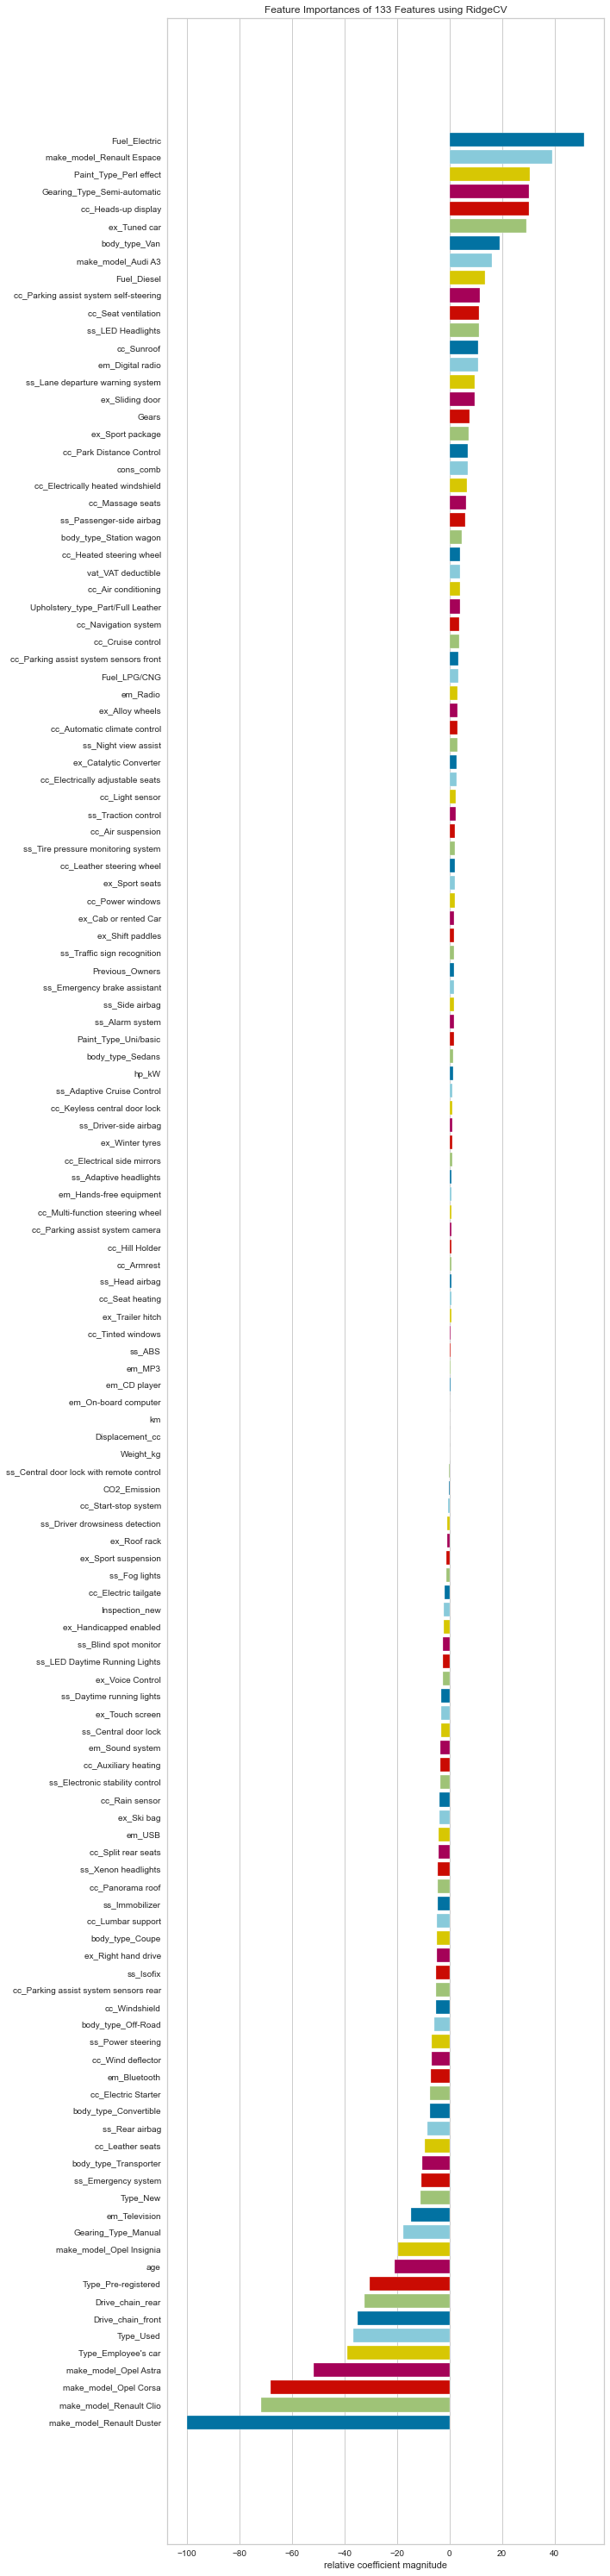

<AxesSubplot:title={'center':'Feature Importances of 133 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [226]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

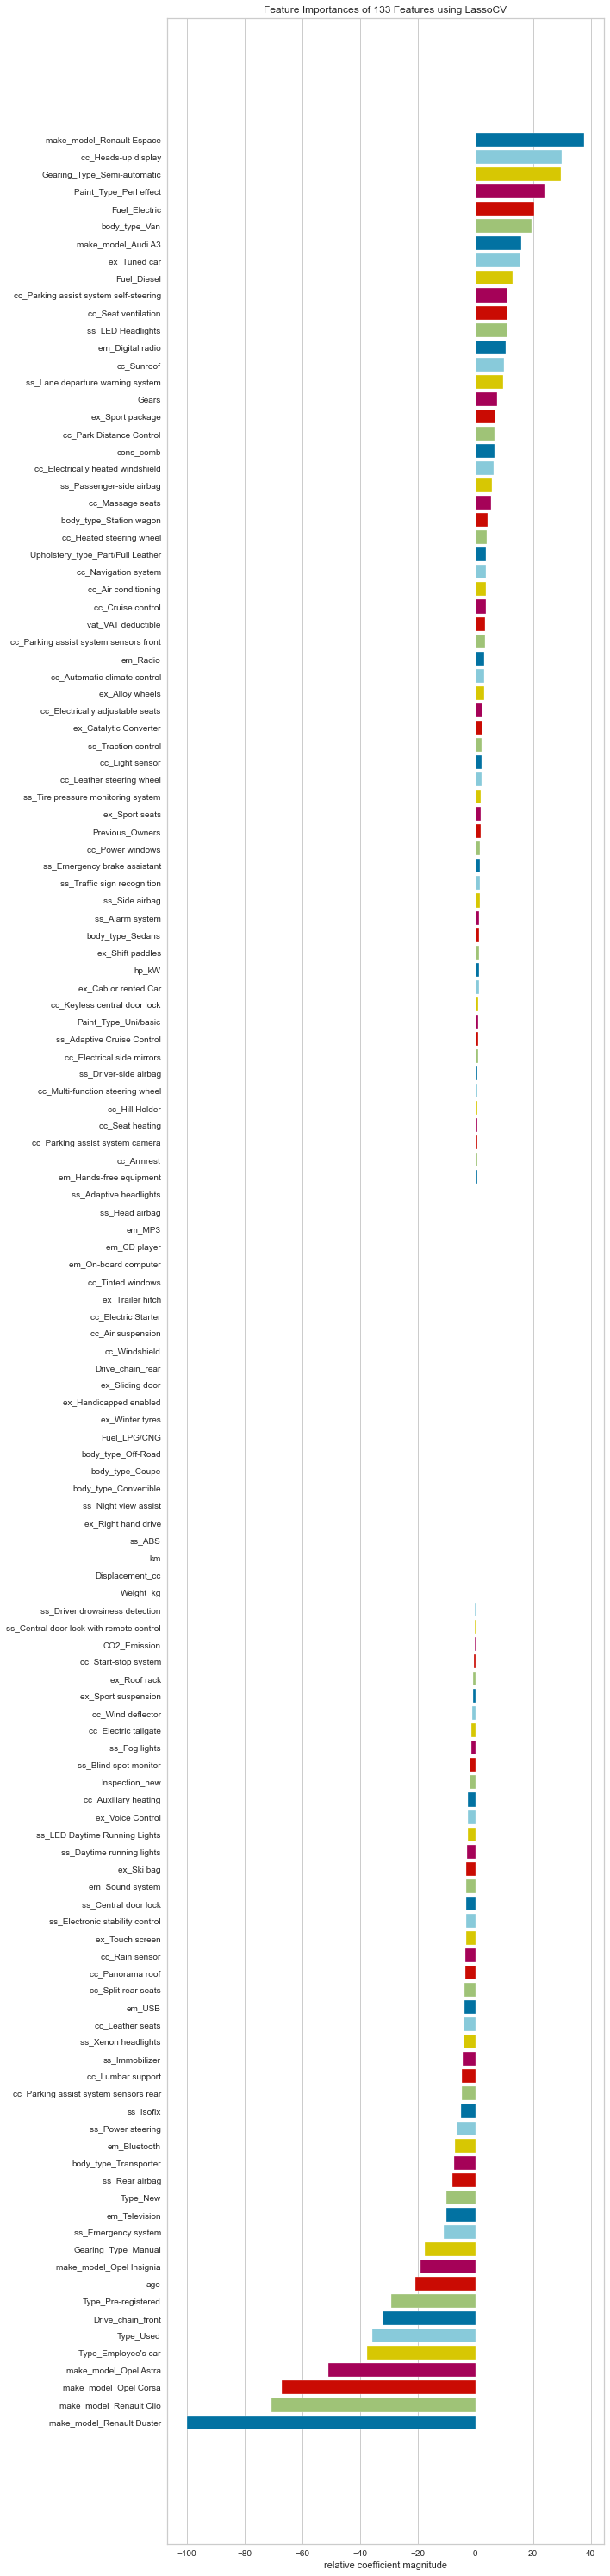

<AxesSubplot:title={'center':'Feature Importances of 133 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [227]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___